# Analysis of Diabetes Health Indicators Dataset from Kaggle

> Source: Teboul, A. (2021). Diabetes Health Indicators Dataset. [Kaggle](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/).

> Source: University of California, Irvine. (2023). CDC Diabetes Health Indicators Data Set. [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators).

> All files available on my Github [at this link](https://github.com/apretko11/Intro-to-Supervised-ML). Note that some functions are based on those that I created as part of the week 4 or week 5 programming labs for this course.







# Interest in Data
> My interest in pursing this data set comes from my work in the Healthcare field. I am currently working on understanding the impact of an AI project on the patient clinical and financial outcomes, but I haven't worked much with the algorithm itself due to my inexperience. I wanted to look at this dataset to better understand how we might approach our own algorithm, which identifies high risk patients for cancer and aortic aneurysms. Hopefully this exercise will help me better understand that process.





# Supervised Learning Problem Description
> Diabetes is a chronic medical condition that is treatable, manageable, and in some cases predictable. Left untreated, the condition can have serious complications up to and including death. I want to explore how data can help predict the occurrence of diabetes. While I am currently doing this as an academic exercise, if the results are interesting, we could look at incorporating this into a future program.

## EDA: About the Data
>The data itself came from Kaggle but was found through the UCI machine learning database repository (both linked above) with a note that the data is originally CDC data. I have saved the data and analysis files to my Github as well so you can access it there.

>A quick glance at the opening lines of the data suggest that it is well formatted, but we will look into it closely to see if there are any alterations or adjustments that we need to make.

In [228]:
# Import the necessary libraries for the analysis
# Please ensure these are installed before running, otherwise the code will not run fully
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import random

# read in the data from my personal github (original sources cited above)
df = pd.read_csv('https://raw.githubusercontent.com/apretko11/Intro-to-Supervised-ML/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


# EDA: Distribution of Positive and Negative Values for Diabetes
>Looking at the distribution of data, we see an even split between Positive and Negative values for Diabetes. This makes sense since the authors wanted to have an equal number of samples for each category randomly chosen from those that are Positive and those that are Negative.

50.0% of patients are positive for diabetes, while 50.0% of patients are negative.
----------------------------------------------------------------------------------


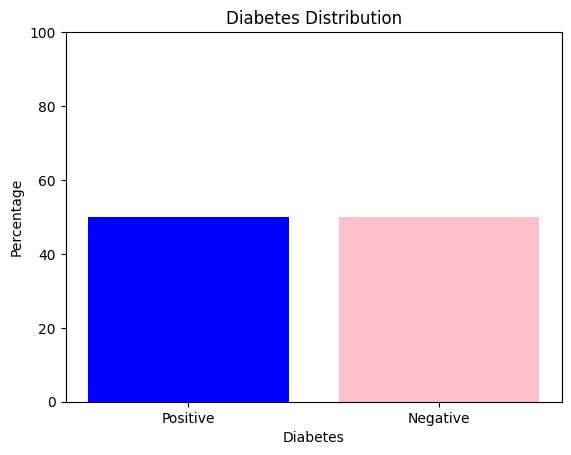

In [229]:
pos_per = len(df[df['Diabetes_binary'] == 1]) / len(df) * 100
neg_per = len(df[df['Diabetes_binary'] == 0]) / len(df) * 100

print(f"{pos_per:.1f}% of patients are positive for diabetes, while {neg_per:.1f}% of patients are negative.")
print("----------------------------------------------------------------------------------")

categories = ['Positive', 'Negative']
percentages = [pos_per, neg_per]

# Create bar chart
plt.bar(categories, percentages, color=['blue', 'pink'])
plt.xlabel('Diabetes')
plt.ylabel('Percentage')
plt.title('Diabetes Distribution')
plt.ylim(0, 100);  # Set the y-axis range to 0-100

# EDA: Overview of Variables
>Looking more closely at the data, we see 70,692 samples in the data, all of which are non-null and have a float64 type. I thought that I might have to adjust this to int format later if that 1.0 vs 1 format impacted the analysis, but fortunately that was not the case. As shown above, the data is equally split between positive and negative for diabetes. The data has one target variable which is Diabetes_binary (1 indicates positive while 0 indicates negative for diabetes) and 21 features that we can use to predict Diabetes_binary.

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

# EDA: Detailed on Variable Values
>The code below shows that these are mostly but not exclusively binary variables.

>The exact definitions of each variable are on the UCI website linked above, but the binary variables generally encode "YES" to the value of 1. For example, a value of 1 for DiffWalk means that "Yes, the patient has difficulty walking." A value of 1 for Sex indicates male, while 0 indicates female. The dataset makes no note of anything relating to those that are intersex or transgender so I will analyze the data ***as is*** but acknowledge this might represent a gap here to be addresed.

>BMI represents the actual value while Age, Education, and Income do not represent the actual value but represent different ordinal categories. For example, the UCI gives notes that "1 = 18-24, 9 = 60-64, 13 = 80 or older." While we do not have the exact age values, they do represent relative increases or decreases, so we know that someone with a value of 11 for Age is significantly older than someone with a value of 4, even though we do not know what the actual age values are here.

>GenHlth represents a rating of overall health from 1 to 5 with 1 representing excellent and 5 representing the absolute worst. MentHlth and PhysHlth both represent "How many of the past 30 days was your mental/physical health not good?" For all three of these variables, a higher value indicates poorer wellbeing.

>All values appear to be sensical without any missing data, so there isn't a need to adjust or exclude any entries or values.

In [231]:
binary_variables = []
non_binary_variables = []

for col in df.columns:
    unique_values = df[col].unique()
    print(col, unique_values)
    print('---')

    if len(unique_values) == 2 and np.isin(0, unique_values) and np.isin(1, unique_values):
        binary_variables.append(col)
    else:
        non_binary_variables.append(col)

assert len(binary_variables) + len(non_binary_variables) == len(df.columns), "Check Number of Columns"

print("Binary Variables:", binary_variables)
print("---")
print("Non-Binary Variables:", non_binary_variables)

Diabetes_binary [0. 1.]
---
HighBP [1. 0.]
---
HighChol [0. 1.]
---
CholCheck [1. 0.]
---
BMI [26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 36. 47.
 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92. 53.
 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 73. 76. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 62.
 64. 66. 85. 70. 83. 80. 78. 74.]
---
Smoker [0. 1.]
---
Stroke [0. 1.]
---
HeartDiseaseorAttack [0. 1.]
---
PhysActivity [1. 0.]
---
Fruits [0. 1.]
---
Veggies [1. 0.]
---
HvyAlcoholConsump [0. 1.]
---
AnyHealthcare [1. 0.]
---
NoDocbcCost [0. 1.]
---
GenHlth [3. 1. 2. 4. 5.]
---
MentHlth [ 5.  0.  7.  3.  4.  2. 30. 20.  1. 15. 10. 25. 14. 28.  6. 29. 26. 12.
 16. 22. 13.  8.  9. 21. 18. 17. 27. 24. 23. 11. 19.]
---
PhysHlth [30.  0. 10.  3.  6.  4. 15.  1.  2. 14.  7. 25. 21. 20.  5.  8. 22. 23.
 29. 12. 18. 28. 26. 24. 27. 11. 13. 16. 17.  9. 19.]
---
DiffWalk [0. 1.]
---
Sex [1. 0.]
---
Age [ 4. 12. 13

# EDA: Correlation Heatmap
>Below is a correlation map showing the correlation between variables. The strongest correlations on the table are unfortunately not between the dependent variable and an independent variable but between different independent variables (e.g. GenHlt with PhysHlth or Education with Income).

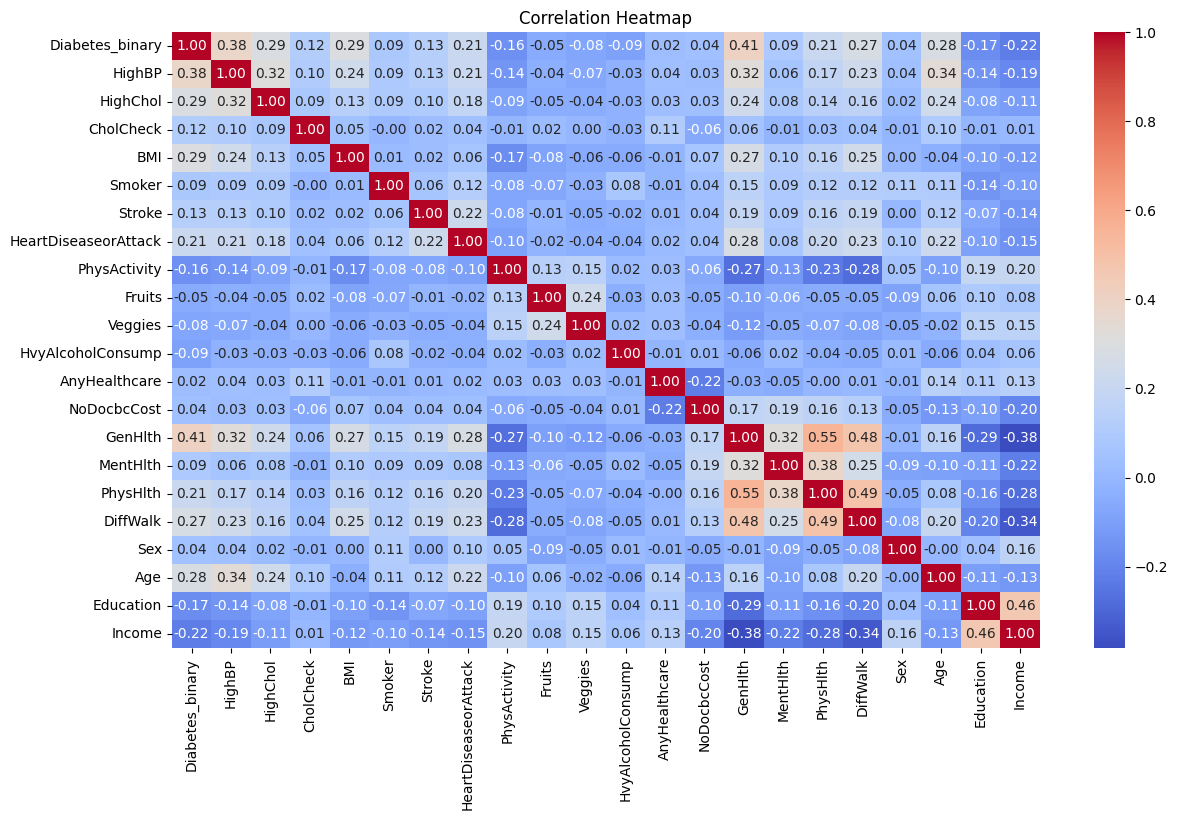

In [232]:
all_corr = df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(all_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap');

# Analysis of Model-Building and Training: Splitting the Data
>I have chosen to use a decision tree for this task for several reasons. First, it's something that I haven't worked with before this class but have wanted to understand better. Second, I'm working on a classification problem, which decision trees can handle fairly well. Lastly, I want the results to be something that is visually engaging and readily explainable to another individual, as I frequently work with individuals that are medical professionals but not well-versed in machine learning. By choosing a method that they can understand visually and with with some explanation, I have a better chance of gaining the interest and support I need to investigate it further and potentially implement something.

>Below I split the data into training and test sets, with 80% going in to the training set and 20% in the test set. Y is the dependent binary variable of 'Diabetes_binary' while all the others are used as independent variables. The print functions confirm that X contains the 21 features described above and Y is the sole dependent variable. The print statements also confirm that the train-test split is functioning correctly.

In [233]:
X = df.drop('Diabetes_binary', axis=1).values
Y = df['Diabetes_binary'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (56553, 21)
X_test shape: (14139, 21)
Y_train shape: (56553,)
Y_test shape: (14139,)


# Analysis of Model-Building and Training: Creating the Needed Decision Trees Functions
>Next we use several functions to build the decision tree and then to analyze it. Note that these functions are very similar to those that I created as part of the week 4 assignment. I have removed the text description for the sake of brevity.

In [234]:
def build_dt(data_X, data_y, max_depth = None, max_leaf_nodes = None):

    dt = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
    dt.fit(data_X, data_y)
    return dt

def calculate_precision(y_true, y_pred, pos_label_value=1.0):

    tp = ((y_true==pos_label_value) & (y_pred==pos_label_value)).sum()
    fp = ((y_true!=pos_label_value) & (y_pred==pos_label_value)).sum()

    return tp/(tp+fp)

def calculate_recall(y_true, y_pred, pos_label_value=1.0):

    tp = ((y_true==pos_label_value) & (y_pred==pos_label_value)).sum()
    fn = ((y_true==pos_label_value) & (y_pred!=pos_label_value)).sum()

    return tp/(tp+fn)

# Analysis of Model-Building and Training: Sample Tree Output
>Next I instantiate a tree and plot it to help me visualize this. Note that I will sensitize the parameters later but have used max_depth=3 as a starting point. Visualizing larger trees becomes difficult due to the number of leaves and image width.

WARNING: Be careful when specifying or not specifying max_depth here. Without specifying max_depth, the program ran for over five minutes before I manually cancelled execution. This is due to the size of the data being used. You are welcome to change the variable but I would advise against using more than a handful of layers here. This will be shown in a further plot.

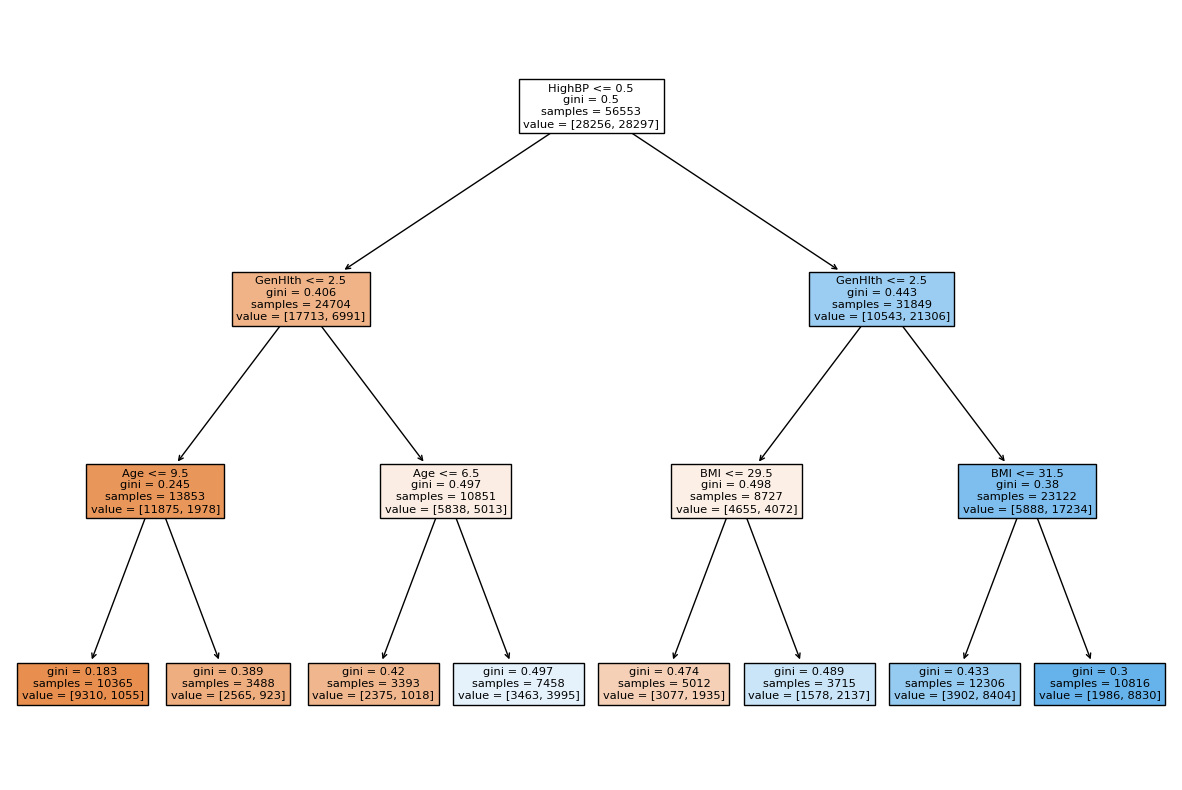

In [235]:
dt = build_dt(X_train, Y_train, max_depth=3)
plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, feature_names=list(df.columns[1:]));

# Analysis of Model-Building and Training: Performance Metrics Vs Depth
>Below I generate the values of precision and recall for trees of different depths. They show that precision and recall are both an improvement over a 50-50 guess (reflecting the even 50-50 split) but show limited improvement after even a very shallow depth. The graph helps visually confirm this, showing limited improvement beyond a depth of 4 to 6.

Max Depth: 2, Accuracy: 0.6997, Precision: 0.7390, Recall: 0.6148
------------------------------------------------------------------------
Max Depth: 3, Accuracy: 0.7162, Precision: 0.6764, Recall: 0.8261
------------------------------------------------------------------------
Max Depth: 4, Accuracy: 0.7280, Precision: 0.7134, Recall: 0.7595
------------------------------------------------------------------------
Max Depth: 5, Accuracy: 0.7352, Precision: 0.7179, Recall: 0.7724
------------------------------------------------------------------------
Max Depth: 6, Accuracy: 0.7365, Precision: 0.7226, Recall: 0.7654
------------------------------------------------------------------------
Max Depth: 7, Accuracy: 0.7372, Precision: 0.7109, Recall: 0.7970
------------------------------------------------------------------------
Max Depth: 8, Accuracy: 0.7383, Precision: 0.7232, Recall: 0.7698
------------------------------------------------------------------------


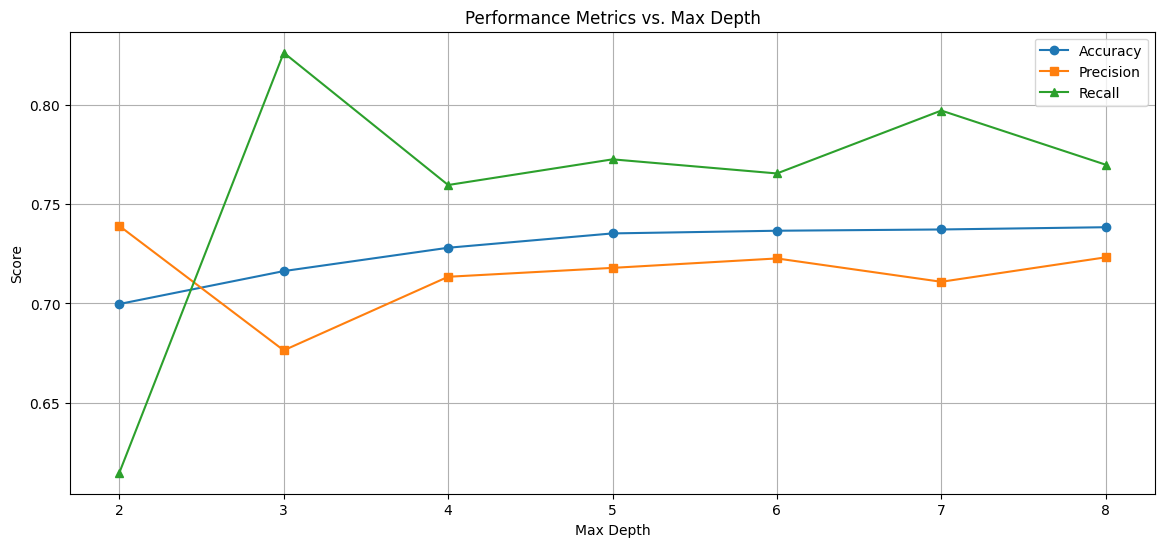

In [242]:
results = []
arboles = []

for i in range(2, 9):
    dt = build_dt(X_train, Y_train, max_depth=i)
    arboles.append(dt)
    Y_pred = dt.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)  # Calculate accuracy
    precision = calculate_precision(Y_test, Y_pred, pos_label_value=1.0)
    recall = calculate_recall(Y_test, Y_pred, pos_label_value=1.0)
    results.append((i, accuracy, precision, recall))

for result in results:
    max_depth, accuracy, precision, recall = result
    print(f"Max Depth: {max_depth}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    print("------------------------------------------------------------------------")

max_depths = [result[0] for result in results]
accuracies = [result[1] for result in results]
precisions = [result[2] for result in results]
recalls = [result[3] for result in results]

plt.figure(figsize=(14, 6))
plt.plot(max_depths, accuracies, label='Accuracy', marker='o', linestyle='-')
plt.plot(max_depths, precisions, label='Precision', marker='s', linestyle='-')
plt.plot(max_depths, recalls, label='Recall', marker='^', linestyle='-')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Max Depth')
plt.legend()
plt.grid(True)

# Result: The Chosen Model
>The cell below shows a graphical representation of the tree that I have selected as the best trade off between complexity and performance.

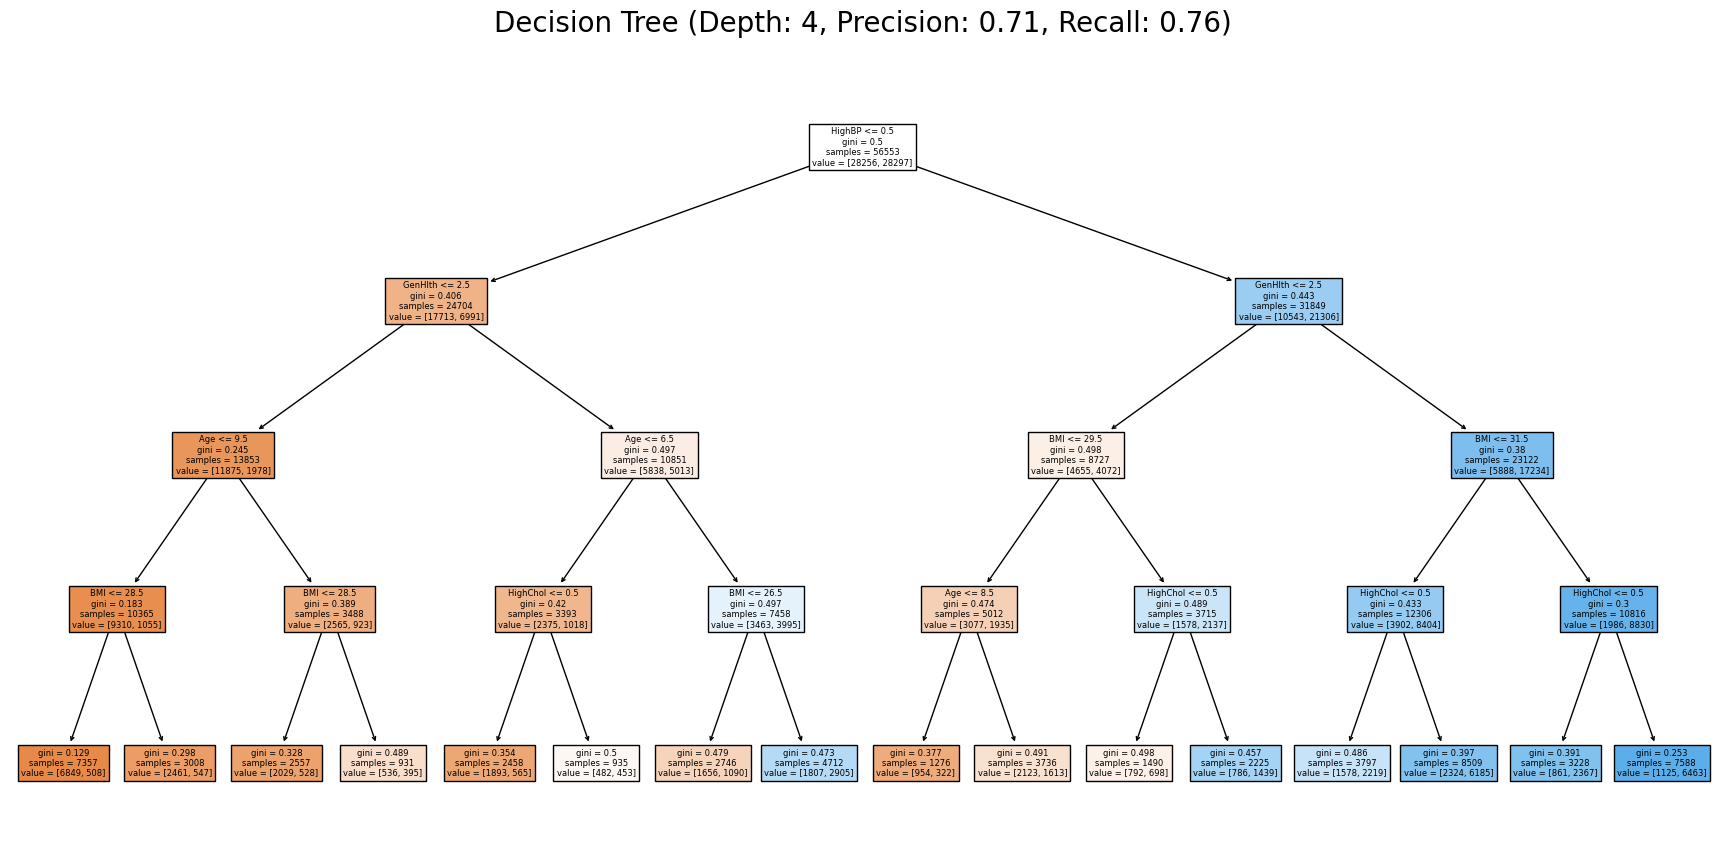

In [238]:
dt = build_dt(X_train, Y_train, max_depth=4)
Y_pred = dt.predict(X_test)

precision = calculate_precision(Y_test, Y_pred, pos_label_value=1.0)
recall = calculate_recall(Y_test, Y_pred, pos_label_value=1.0)

title = f"Decision Tree (Depth: {dt.tree_.max_depth}, Precision: {precision:.2f}, Recall: {recall:.2f})"
plt.figure(figsize=(22, 10))
plot_tree(dt, filled=True, feature_names=list(df.columns[1:]));
plt.text(0.5, 1.05, title, horizontalalignment='center', fontsize=20, transform=plt.gca().transAxes);

# Result: Cross Validating the Chosen Model
>Below I've employed cross fold validation to show that the tree I've chosen performs well. The data shows that it performs well across the different 10 folds that I've performed with limited variation in performance.

In [239]:
def cv_dt(max_depth=None, ):
    dt = DecisionTreeClassifier(max_depth=max_depth)
    return dt

k = 10
cv_scores = cross_val_score(cv_dt(max_depth=4), X_train, Y_train, cv=k, scoring='accuracy')
mean_score = cv_scores.mean()
std_score = cv_scores.std()

print(f"{k}-Fold Cross-Validation Results with :")
print(f"Mean Accuracy: {mean_score:.4f}")
print("List of Accuracy Scores: ",cv_scores)
print(f"Standard Deviation: {std_score:.4f}")

10-Fold Cross-Validation Results with :
Mean Accuracy: 0.7293
List of Accuracy Scores:  [0.73285007 0.72949081 0.72949081 0.72785146 0.7372237  0.72572944
 0.73616269 0.72661362 0.72007073 0.72767462]
Standard Deviation: 0.0048


# Results: Sanity Checking Against Other Cross-Validated Models
>I also wanted to compare the accuracy, precision and recall values using other depths (similar to the chart I showed earlier), which shows a similar trend. Minimal performance improvement after a depth of 4-6 but with some consistent improvement up until that point.

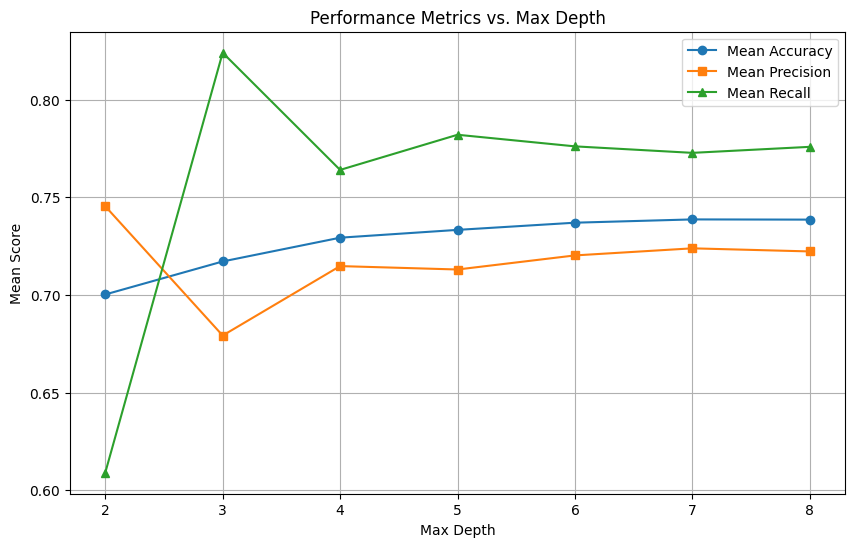

In [240]:
mean_accuracies = []
mean_precisions = []
mean_recalls = []

# Loop through different max_depth values
for depth in list(range(2, 9)):
    dt = cv_dt(max_depth=depth)

    # Calculate mean accuracy
    cv_scores_accuracy = cross_val_score(dt, X_train, Y_train, cv=k, scoring='accuracy')
    mean_accuracy = cv_scores_accuracy.mean()
    mean_accuracies.append(mean_accuracy)

    # Calculate mean precision
    cv_scores_precision = cross_val_score(dt, X_train, Y_train, cv=k, scoring='precision')
    mean_precision = cv_scores_precision.mean()
    mean_precisions.append(mean_precision)

    # Calculate mean recall
    cv_scores_recall = cross_val_score(dt, X_train, Y_train, cv=k, scoring='recall')
    mean_recall = cv_scores_recall.mean()
    mean_recalls.append(mean_recall)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, mean_accuracies, marker='o', label='Mean Accuracy')
plt.plot(max_depths, mean_precisions, marker='s', label='Mean Precision')
plt.plot(max_depths, mean_recalls, marker='^', label='Mean Recall')
plt.title('Performance Metrics vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Score')
plt.legend()
plt.grid(True)

# Additional: Random Forest

>Since decision trees tend to overfit data, I wanted to compare my results to the output of a random forest. The results are similar to those realized with a single decision tree with depth of 4, which suggests that my simpler single Decision Tree does a servicable job of capturing the predictive power of the data available.

In [247]:
def build_random_forest(data_X, data_y, n_estimators=100, max_depth=8):
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf.fit(data_X, data_y)
    return rf

# Build and train the Random Forest model
rf = build_random_forest(X_train, Y_train, n_estimators=100, max_depth=None)

# Predict on the test set
Y_pred_rf = rf.predict(X_test)

# Calculate performance metrics for the Random Forest
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
precision_rf = calculate_precision(Y_test, Y_pred_rf, pos_label_value=1.0)
recall_rf = calculate_recall(Y_test, Y_pred_rf, pos_label_value=1.0)

print("Random Forest Results:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")


Random Forest Results:
Accuracy: 0.7371
Precision: 0.7172
Recall: 0.7804


#Discussion of Results and Conclusion
> The results show that using a decision tree or a random forest is able to do a decent job of predicting diabetes based on the data we have. It's imperfect, but it's successful about 75% of the time, while a random guess would only work about 50% of the time.

> The tree that I think is best is using a max_depth of 4 (I have chosen to specify depth rather than leaves), which allows for a reasonable level of complexity without being overfit. It also maintains decent performance metrics.

>The main variables that are used in the tree are HighBP, GenHlth, BMI, Age, and HighChol, which make sense as they may be more directly causal than variables such as Education or Income.

>For future analysis, I could consider transforming the variables or using a different predictive method altogether. For example, I could add in a logistic regression and see how those classifications compare to these.

>Overall I am happy with the model but would welcome any feedback on how to improve the model, the analysis, the presentation, or any other aspects of this document.